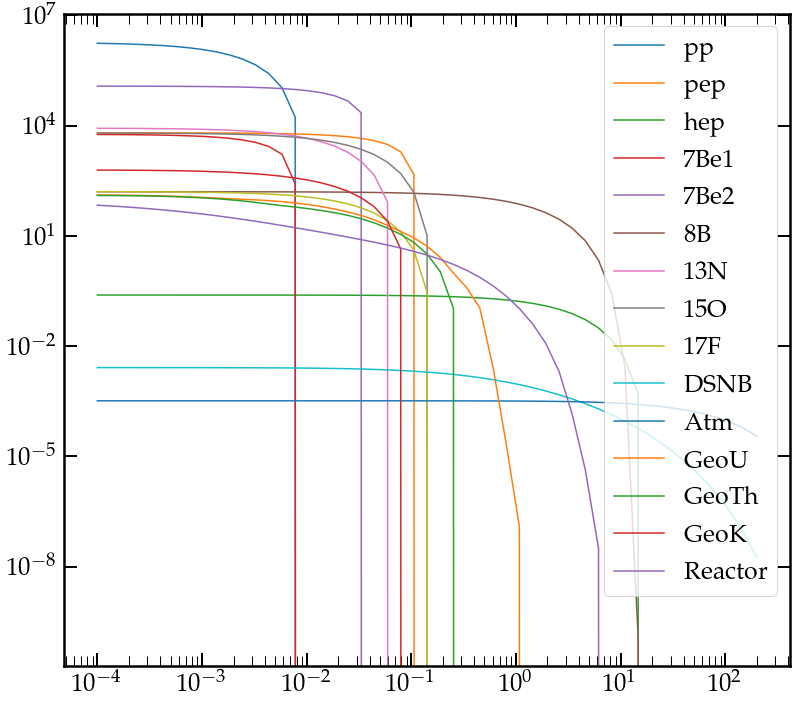

In [1]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from LabFuncs import *
import cmocean


Nuc = Ar40

E_th = 1.0e-4
E_max = 200.0

nTot_bins = 50

E_edges = logspace(log10(E_th),log10(E_max),nTot_bins+1)

nm = 1000
m_vals = logspace(-1,4,nm)

R_wimp = zeros(shape=(nm,nTot_bins))
for i in range(0,nm):
    dR = dRdE_wimp(E_edges,array([67.0+Jan1]),WIMP(m_vals[i],1.0e-45),Nuc=Nuc,HaloModel=SHM)
    R_wimp[i,:] = 0.5*(dR[1:]+dR[0:-1])*(E_edges[1:]-E_edges[0:-1])
    

Names,Solar,E_nu_all,Flux_all,Flux_norm,Flux_err = GetNuFluxes(E_th,Nuc=Nuc)
#Flux_err[Names=='8B'] = B8Flux_GS98
#Flux_err[Names=='8B'] = B8Unc_GS98
dR = AllNuRates(E_edges,67.0+Jan1,Solar,E_nu_all,Flux_all,Nuc=Nuc)
n_nu = shape(Flux_all)[0]
R_nu = zeros(shape=(n_nu,nTot_bins))
for i in range(0,n_nu):
    R_nu[i,:] = 0.5*(dR[i,1:]+dR[i,0:-1])*(E_edges[1:]-E_edges[0:-1])

fig,ax = MySquarePlot()
for i in range(0,n_nu):
    plt.loglog(E_edges,dR[i,:],label=Names[i])
    
plt.legend()

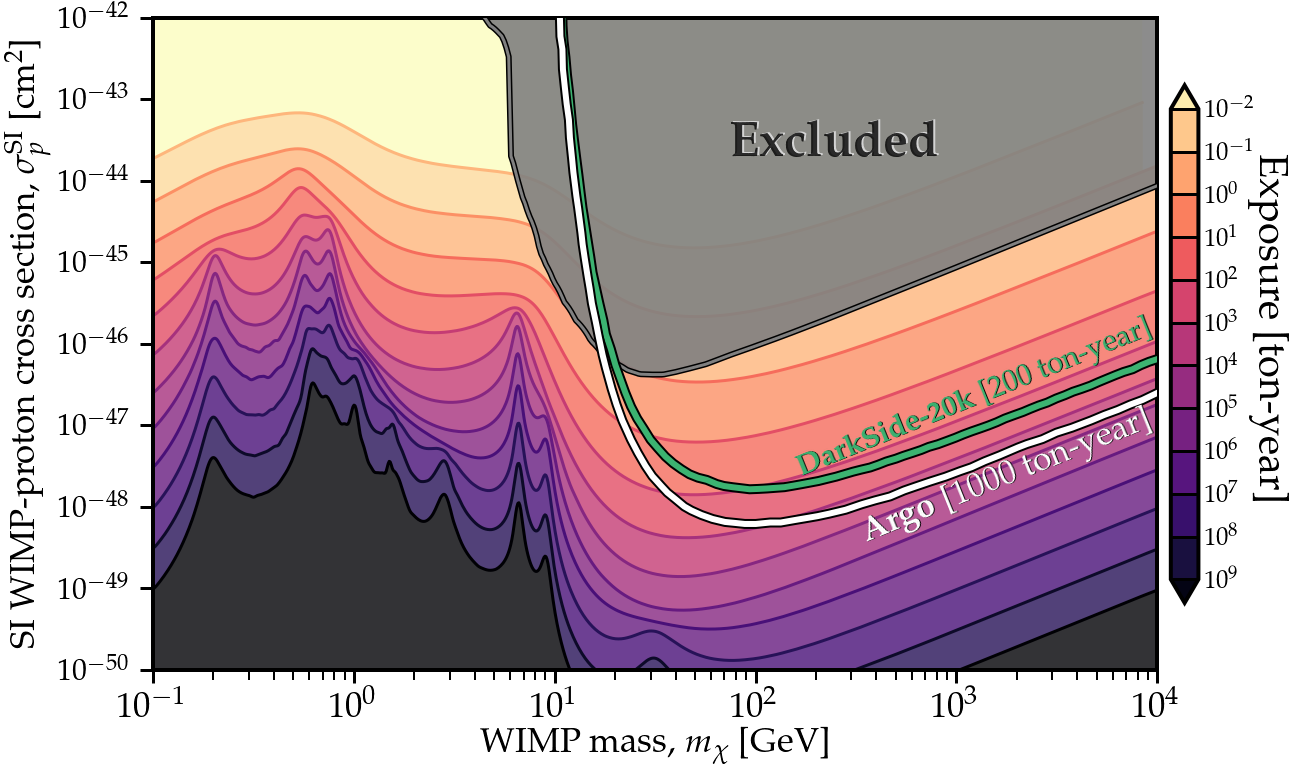

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean
from scipy.ndimage.filters import gaussian_filter1d

inp = 'NuFloorAr'

cmap_name = cm.magma_r
cmap_name_reverse = cm.magma


fig,ax = MySquarePlot(size_x=18,tfs=35,lfs=40,lw=4)

alllimits = loadtxt("../data/WIMPLimits/SI/AllLimits-2018.txt")
plt.fill_between(alllimits[:,0], alllimits[:,1],lw=4,edgecolor='gray',y2=1.0e-30,facecolor='gray',alpha=0.9)
plt.plot(alllimits[:,0], alllimits[:,1],'k-',lw=6,zorder=10)
plt.plot(alllimits[:,0], alllimits[:,1],'-',color='gray',lw=3,zorder=10)

DarkSide = loadtxt("../data/WIMPLimits/SI/DarkSide-200ty.txt",delimiter=',')
plt.plot(DarkSide[:,0], DarkSide[:,1],'-',color='k',lw=10,zorder=10)
plt.plot(DarkSide[:,0], DarkSide[:,1],'-',color='mediumseagreen',lw=6,zorder=10)
plt.gcf().text(0.901,0.3501,r'{\bf DarkSide-20k} [200 ton-year]',fontsize=30,color='k',rotation=22,horizontalalignment='right')
plt.gcf().text(0.9,0.35,r'{\bf DarkSide-20k} [200 ton-year]',fontsize=30,color='mediumseagreen',rotation=22,horizontalalignment='right')

Argo = loadtxt("../data/WIMPLimits/SI/Argo.txt",delimiter=',')
plt.plot(Argo[:,0], Argo[:,1],'-',color='k',lw=10,zorder=10)
plt.plot(Argo[:,0], Argo[:,1],'-',color='w',lw=6,zorder=10)
plt.gcf().text(0.901,0.2741,r'{\bf Argo} [1000 ton-year]',fontsize=34,color='k',rotation=22,horizontalalignment='right')
plt.gcf().text(0.9,0.274,r'{\bf Argo} [1000 ton-year]',fontsize=34,color='w',rotation=22,horizontalalignment='right')
    
inp = 'NuFloorAr'
lim = loadtxt(mylimit_dir+'DL2D_'+inp+'.txt')
Exvals = lim[1:,0]
nex = size(Exvals)
cols = cmap_name(linspace(0.0,1.0,nex+2))
alph_c = 0.8
sig = lim[1:,1:]
sig[sig==0] = nan
m = lim[0,1:]
plt.fill_between(m,gaussian_filter1d(sig[0,:],sigma=2),y2=1.0e-30,lw=0,color=cols[0,:],alpha=alph_c,zorder=-10,edgecolor='face')
for i in range(1,nex):
    y = sig[i,:]
    y = gaussian_filter1d(sig[i,:],sigma=2)
    plt.fill_between(m,gaussian_filter1d(sig[i,:],sigma=2),y2=gaussian_filter1d(sig[i-1,:],sigma=2),lw=0,color=cols[i,:],alpha=alph_c,zorder=-10,edgecolor='face')
plt.fill_between(m,gaussian_filter1d(sig[-1,:],sigma=2),y2=1.0e-52,lw=0,color=cols[-1,:],alpha=alph_c,zorder=-10,edgecolor='face')

for i in range(0,nex):
    y = sig[i,:]
    #plt.loglog(m,sig[i,:],'k-',lw=5,zorder=-9)
    y = gaussian_filter1d(y,sigma=2)
    plt.loglog(m,y,'-',lw=3,color=cols[i+2,:],zorder=-9,alpha=1.0)

plt.yscale('log')
plt.xscale('log')

# Labels
plt.xlabel(r"WIMP mass, $m_\chi$ [GeV]",fontsize=35)
plt.ylabel(r"SI WIMP-proton cross section, $\sigma^{\rm SI}_p$ [cm$^2$]",fontsize=35)

# Style
plt.yticks(10.0**arange(-50,-30,1),fontsize=30)
ax.tick_params(which='major',direction='out',width=3,length=13,right=False,top=False,pad=10)
ax.tick_params(which='minor',direction='out',width=2,length=10,right=False,top=False)

plt.ylim([1e-50,1e-42])
plt.xlim(right=10000,left=0.1)

# plt.plot([60,60],[1e-50,1e-42],'w--',lw=2.5,zorder=-1)
# plt.arrow(0.556, 0.2, 0.03, 0.00, transform=fig.transFigure,figure=fig,
#       length_includes_head=True,lw=2.5,
#       head_width=0.012, head_length=0.012, overhang=0.2,
#       edgecolor='w',facecolor='w',clip_on=False)
# plt.gcf().text(0.535,0.2,r'{\bf Atm-}$\nu$',color='w',fontsize=28,rotation=90,verticalalignment='center')

# plt.plot([15,15],[1e-50,1e-42],'w--',lw=2.5,zorder=-1)
# plt.arrow(0.465, 0.2, 0.03, 0.00, transform=fig.transFigure,figure=fig,
#       length_includes_head=True,lw=2.5,
#       head_width=0.012, head_length=0.012, overhang=0.2,
#       edgecolor='w',facecolor='w',clip_on=False)
# plt.gcf().text(0.443,0.2,r'{\bf DSNB}',color='w',fontsize=28,rotation=90,verticalalignment='center')

# plt.plot([4,4],[1e-50,1e-42],'w--',lw=2.5,zorder=-1)
# plt.arrow(0.375, 0.2, 0.03, 0.00, transform=fig.transFigure,figure=fig,
#       length_includes_head=True,lw=2.5,
#       head_width=0.012, head_length=0.012, overhang=0.2,
#       edgecolor='w',facecolor='w',clip_on=False)
# plt.gcf().text(0.353,0.2,r'$^{8}${\bf B}',color='w',fontsize=28,rotation=90,verticalalignment='center')


# Custom colorbar
cbaxes = inset_axes(ax, width="4%", height="45%", bbox_to_anchor=[535, -440, 690, 1150]) 
norm = mpl.colors.Normalize(vmin=-3,vmax=10)
sm = plt.cm.ScalarMappable(cmap=cmap_name_reverse, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=arange(-3,11),boundaries=arange(-3,11),extend='both')
f = plt.gcf().get_children()
cbar = f[2]
ylabs = [r'$10^9$',r'$10^8$',r'$10^7$',r'$10^6$',r'$10^5$',r'$10^4$',r'$10^3$',r'$10^2$',r'$10^1$',r'$10^0$',r'$10^{-1}$',r'$10^{-2}$']
cbar.set_yticklabels(ylabs)
cbar.tick_params(labelsize=25) 
cbar.tick_params(which='major',direction='in',width=3,length=26,left=True,right=False,pad=7)


plt.gcf().text(0.97,0.33,r'Exposure [ton-year]',fontsize=40,rotation=-90,ha='left')

plt.gcf().text(0.572,0.721,r'{\bf Excluded}',fontsize=50,color='lightgray')
plt.gcf().text(0.57,0.72,r'{\bf Excluded}',fontsize=50,color='k',alpha=0.8)

plt.show()
MySaveFig(fig,inp)